In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 

In [2]:
df=pd.read_csv("Healthcare-Diabetes.csv ")
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [4]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.isnull()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2763,False,False,False,False,False,False,False,False,False,False
2764,False,False,False,False,False,False,False,False,False,False
2765,False,False,False,False,False,False,False,False,False,False
2766,False,False,False,False,False,False,False,False,False,False


In [7]:
(df==0).sum()

Id                             0
Pregnancies                  412
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1816
dtype: int64

In [8]:
df.drop(["Id"],axis=1,inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


In [9]:
col_with_zeros=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[col_with_zeros]=df[col_with_zeros].replace(0,np.nan)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75.0,64.0,24.0,55.0,29.7,0.370,33,0
2764,8,179.0,72.0,42.0,130.0,32.7,0.719,36,1
2765,6,85.0,78.0,NaN,NaN,31.2,0.382,42,0
2766,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1


In [10]:
df.dropna(inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
2762,1,79.0,60.0,42.0,48.0,43.5,0.678,23,0
2763,2,75.0,64.0,24.0,55.0,29.7,0.370,33,0
2764,8,179.0,72.0,42.0,130.0,32.7,0.719,36,1
2766,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1


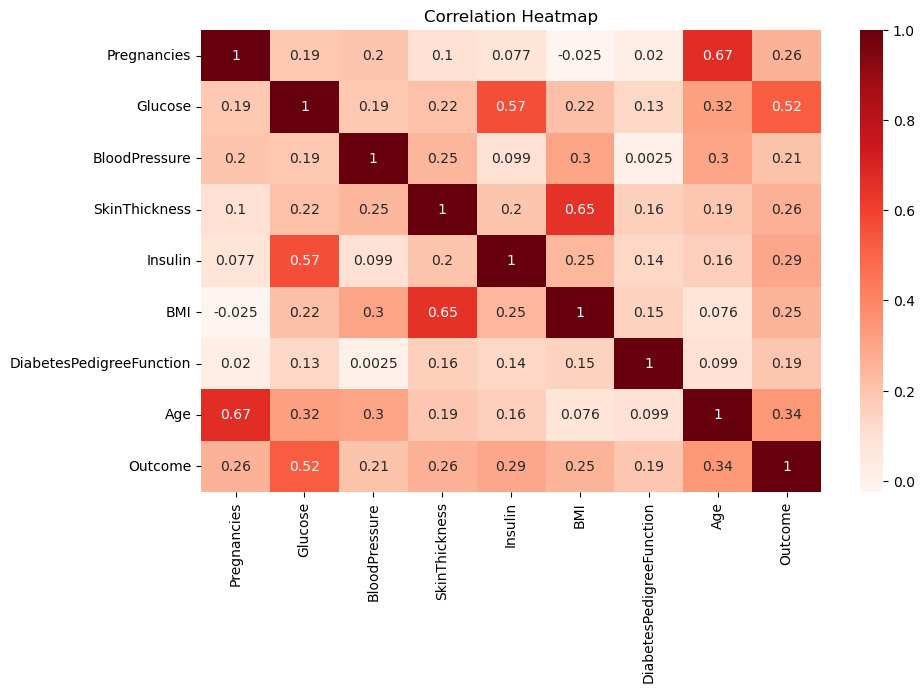

In [11]:
corr=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap="Reds")
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

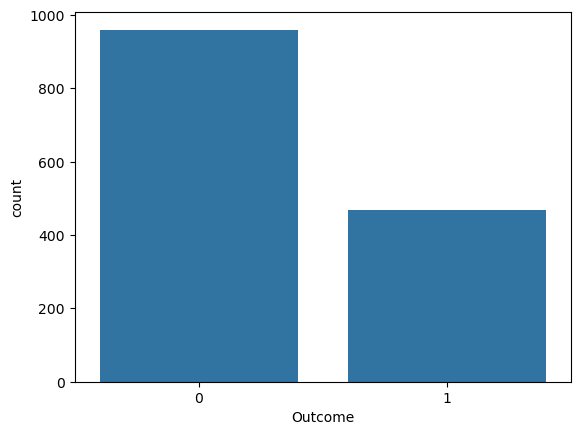

In [ ]:
sns.countplot(x="Outcome",data=df,palette="Set1")

In [13]:
from sklearn.model_selection import train_test_split
X=df.drop("Outcome",axis=1)
Y=df["Outcome"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [14]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(
    n_estimators=200,        # more trees for stability
    max_depth=6,             # prevent deep overfitting
    min_samples_split=10,    # node must have 10 samples to split
    min_samples_leaf=5,      # leaf must have at least 5 samples
    max_features='sqrt',     # sqrt(num_features) for splits
    random_state=42
)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [ ]:
Y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Precision:",precision_score(Y_test,Y_pred))
print("Recall:",recall_score(Y_test,Y_pred))
print("F1 Score:",f1_score(Y_test,Y_pred))

Accuracy: 0.9265734265734266
Precision: 0.8795180722891566
Recall: 0.8690476190476191
F1 Score: 0.874251497005988


In [16]:
train_acc = model.score(X_train, Y_train)
test_acc = model.score(X_test, Y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 0.9439
Test Accuracy: 0.9266


In [17]:
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)

Precision: 0.8795180722891566


In [18]:
person = {
    "Pregnancies":1,
    "Glucose": 155,
    "BloodPressure": 85,
    "SkinThickness":32.0,
    "Insulin": 90,
    "BMI":35.3,
    "DiabetesPedigreeFunction":0.254,
    "Age":45,
}


In [19]:
import pandas as pd
person_df = pd.DataFrame([person])
person_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,155,85,32.0,90,35.3,0.254,45


In [20]:
risk =model.predict(person_df)
print("Risk prediction:", risk)

Risk prediction: [1]


In [21]:
risk_proba = model.predict_proba(person_df)
print("Risk probability:", risk_proba)


Risk probability: [[0.38247217 0.61752783]]
